<a href="https://colab.research.google.com/github/mssamoilenko/AnlDataPract/blob/main/AnlPrakt4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практична робота №4

## Тема: A/B тест та статистична значущість.

## Мета: проведення власного експерименту щодо оцінки різного дизайну веб-сторінок, закріплення навичок проведення A/B тесту та підтвердження статистичної значущості результатів експерименту.

## Варіант №2

## Завдання

1.   Завантажити дані індивідуального варіанту за посиланням на порталі дистанційної освіти.
2.   Використовуючи Pandas відобразити перші 5 рядків даних власного варіанта.
3.   Побудувати коробкові діаграми для даних обох варіантів, розрахувати середнє та медіану.
4.   Самостійно реалізувати перестановочний тест в Python, використовуючи псевдокод, наведений нижче. Оцінити 𝑝-значення за допомогою перестановочного тесту та порівняти із альфа. Зробити висновок про статистичну значущість.

  * a. Альфа взяти 1% для непарних варіантів, 5% для парних.

5.   Використати 𝑡-test для оцінки значущості. Порівняти результати перестановочного A/B тесту і 𝑡-тесту.
6.   Чи правильний висновок зробив ваш колега-новатор?
7.   Навести висновок, який буде містити:

  * a. Чи різниця між варіантами є статистично значущою із відповідними p-значеннями
  * b. Якщо так, то який варіант краще та на скільки відсотків.

## Хід роботи

1.   Завантажую дані індивідуального варіанту за посиланням на порталі дистанційної освіти.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
df = pd.read_csv("2.csv")

2. Використовуючи Pandas відображаю перші 5 рядків даних власного варіанта.

In [2]:
df.head()

,A,B
0,57.12,106.62
1,87.13,125.32
2,140.06,102.05
3,188.39,140.52
4,59.89,61.31


3. Будую коробкові діаграми для даних обох варіантів, розраховую
середнє та медіану.

/tmp/ipython-input-1460610867.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df["A"], df["B"]], labels=["A", "B"])


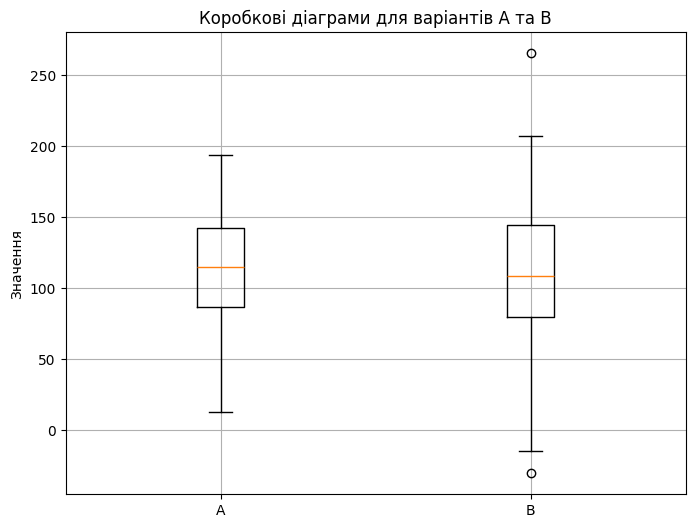

In [4]:
plt.figure(figsize=(8, 6))
plt.boxplot([df["A"], df["B"]], labels=["A", "B"])
plt.title("Коробкові діаграми для варіантів A та B")
plt.ylabel("Значення")
plt.grid(True)
plt.show()

In [5]:
mean_A = df["A"].mean()
median_A = df["A"].median()

mean_B = df["B"].mean()
median_B = df["B"].median()

print("Варіант A:")
print(f"  Середнє: {mean_A:.2f}")
print(f"  Медіана: {median_A:.2f}\n")

print("Варіант B:")
print(f"  Середнє: {mean_B:.2f}")
print(f"  Медіана: {median_B:.2f}\n")

Варіант A:
  Середнє: 113.30
  Медіана: 114.61

Варіант B:
  Середнє: 110.07
  Медіана: 108.61



4. Реалізовую перестановочний тест в Python, використовуючи псевдокод. Оцінюю 𝑝-значення за допомогою перестановочного тесту та порівнюю із альфа. Роблю висновок про статистичну значущість. Альфа беру 5% так як в мене парний варіант.

In [7]:
#Об'єдную результати з різних груп у єдиний набір.
data_A = df["A"].values
data_B = df["B"].values

combined_data = np.concatenate([data_A, data_B])

In [9]:
# Перетасовую об'єднані дані
shuffled_data = np.random.permutation(combined_data)

# Витягую вибірку розміру групи A
perm_A = shuffled_data[:len(data_A)]

In [10]:
# Беру решту даних після вибірки A
remaining_data = shuffled_data[len(data_A):]

perm_B = remaining_data[:len(data_B)]

In [15]:
# Розраховую середні значення для обох груп
mean_perm_A = np.mean(perm_A)
mean_perm_B = np.mean(perm_B)

# Різницю середніх (B - A)
perm_diff = mean_perm_A - mean_perm_B

print("Результати ітерації перестановки:")
print(f"Середнє перестановочної групи A: {mean_perm_A:.4f}")
print(f"Середнє перестановочної групи B: {mean_perm_B:.4f}")
print(f"Різниця середніх (B - A): {perm_diff:.4f}")

Результати ітерації перестановки:
Середнє перестановочної групи A: 113.6377
Середнє перестановочної групи B: 109.7336
Різниця середніх (B - A): 3.9041


In [17]:
# Початкова (спостережувана) різниця середніх
obs_diff = np.mean(data_A) - np.mean(data_B)
obs_diff

np.float64(3.23269999999998)

In [18]:
# Кількість перестановок
R = 200
perm_diffs = []

# Перестановочний тест
for _ in range(R):
    np.random.shuffle(combined_data)
    perm_A = combined_data[:len(data_A)]
    perm_B = combined_data[len(data_A):]
    perm_diff = np.mean(perm_A) - np.mean(perm_B)
    perm_diffs.append(perm_diff)

In [20]:
# Обчислення p-значення (двосторонній тест)
p_value = np.mean(np.abs(perm_diffs) >= np.abs(obs_diff))

alpha = 0.05

print(f"Спостережувана різниця середніх (A - B): {obs_diff:.4f}")
print(f"p-значення: {p_value:.4f}")

if p_value < alpha:
    print("✅ Є статистично значуща різниця між групами (p < 0.05).")
else:
    print("❌ Немає статистично значущої різниці між групами (p ≥ 0.05).")

Спостережувана різниця середніх (A - B): 3.2327
p-значення: 0.6150
❌ Немає статистично значущої різниці між групами (p ≥ 0.05).


5. Використовую 𝑡-test для оцінки значущості. Порівнюю результати
перестановочного A/B тесту і 𝑡-тесту.

In [22]:
t_stat, p_value_ttest = ttest_ind(data_A, data_B, equal_var=False)

print("\n=== t-тест ===")
print(f"t-статистика: {t_stat:.4f}")
print(f"p-значення: {p_value_ttest:.4f}")
print("Висновок:",
      "✅ Значуща різниця" if p_value_ttest < alpha else "❌ Незначуща різниця")


=== t-тест ===
t-статистика: 0.5064
p-значення: 0.6131
Висновок: ❌ Незначуща різниця
